Name: Somraj Bharadwaj Cheppela

Student Id: 23032481

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Reading the dataset
df = pd.read_csv("D:/diabetes.csv")

In [3]:
# Calculate the mean for each column
mean = df.mean(numeric_only=True)

# Print the mean values
print("Mean values ")
print(mean)

Mean values 
Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64


In [4]:
# Calculate the standard deviation for each column
std = df.std(numeric_only=True)

# Print the standard deviation values
print("Standard deviation values")
print(std)

Standard deviation values
Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [7]:
# Assigning the rows to a variable
Glucose = df['Glucose']
BloodPressure = df['BloodPressure']
St = df['SkinThickness']

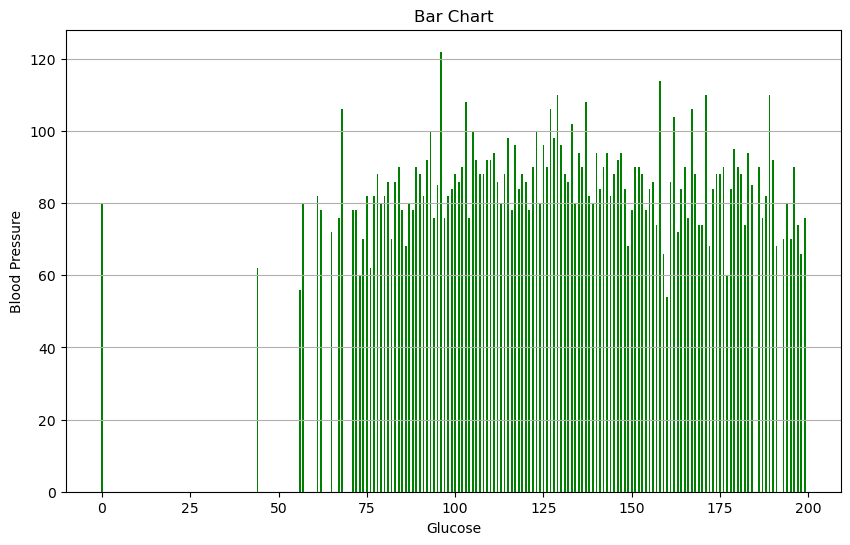

In [8]:
    # Plotting Bar Graph
    """
    Plots a bar chart of Blood Pressure against Glucose levels.

    Parameters:
    - Glucose (array-like): The values of Glucose levels.
    - BloodPressure (array-like): The values of Blood Pressure.

    Returns:
    - None
    """
    # Set the figure size
    plt.figure(figsize=(10, 6)) 
    
    # Plot the bar chart
    plt.bar(Glucose, BloodPressure, color='green', width=0.5)
    
    # Add x-axis label
    plt.xlabel('Glucose')  
    
    # Add y-axis label
    plt.ylabel('Blood Pressure')  
    
    # Add title
    plt.title('Bar Chart')  
    
    # Add grid lines of Y axis
    plt.grid(axis='y')  
    
    # Display the chart
    plt.show()

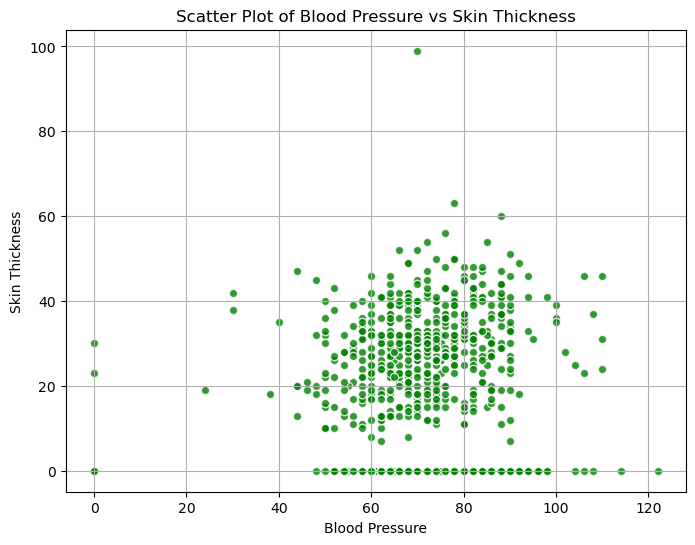

In [9]:
    # Plotting a Scatter plot
    """
    Plots a scatter plot of BloodPressure against Skin Thickness.

    Parameters:
    - BloodPressure (array-like): The values of Blood Pressure.
    - SkinThickness (array-like): The values of Skin Thickness.

    Returns:
    - None
    """
    # Set the figure size
    plt.figure(figsize=(8, 6))
    
    # Plot the scatter plot
    plt.scatter(BloodPressure, St, alpha=0.8, color='green', edgecolors='w')
    
    # Add x-label
    plt.xlabel('Blood Pressure')
    
    # Add y-label
    plt.ylabel('Skin Thickness')
    
    # Add title
    plt.title('Scatter Plot of Blood Pressure vs Skin Thickness')
    
    # Add grid
    plt.grid(True)
    
    # Display the scatter plot
    plt.show()

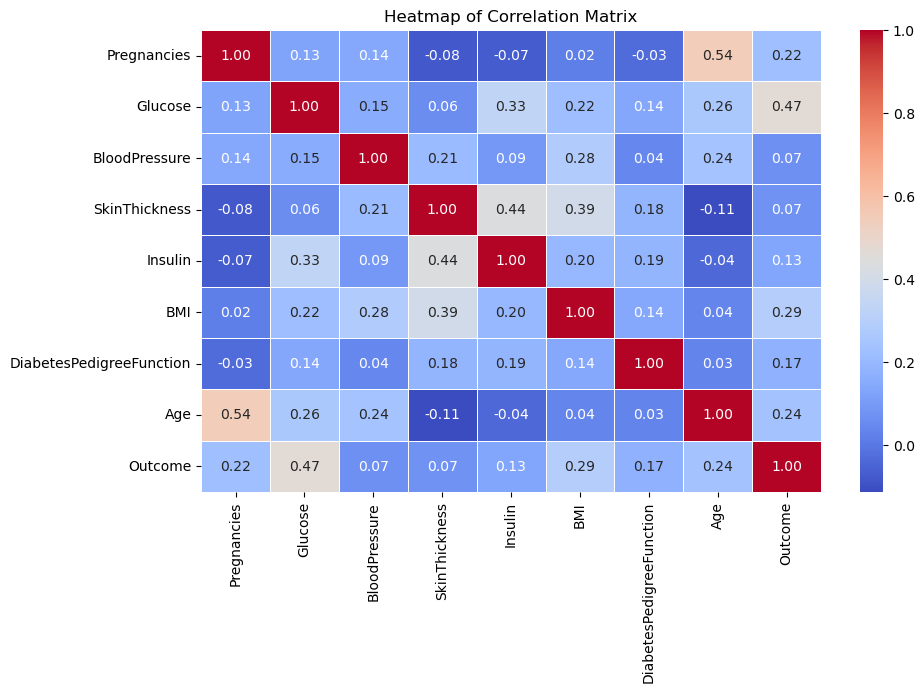

In [10]:
    # Plotting correlation matrix 
    """
    Plots a heatmap of the correlation matrix for the given DataFrame.

    Parameters:
    - df (DataFrame): The input DataFrame containing numerical data.

    Returns:
    - None
    """
    # Set the figure size
    plt.figure(figsize=(10, 6))
    
    # Calculate the correlation matrix
    correlation_matrix = df.corr()

    # Plot the correlation matrix using seaborn
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)

    # Add a title to the plot
    plt.title('Heatmap of Correlation Matrix')

    # Display the plot
    plt.show()

In [11]:
# Separate features and target variable
"""
    Fits K-means clustering to the input DataFrame after preprocessing and determines optimal clusters using the elbow method.

    Parameters:
    - df (DataFrame): The input DataFrame containing features and target variable.

    Returns:
    - df_with_clusters (DataFrame): The input DataFrame with an additional column 'Cluster' representing cluster labels.
"""
X = df.drop('Glucose', axis=1)
y = df['Glucose']

# Data Preprocessing: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)



# Fit k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataset
df['Cluster'] = kmeans.labels_

C:\Users\SOMRAJ BHARADWAJ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SOMRAJ BHARADWAJ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\SOMRAJ BHARADWAJ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SOMRAJ BHARADWAJ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a mem

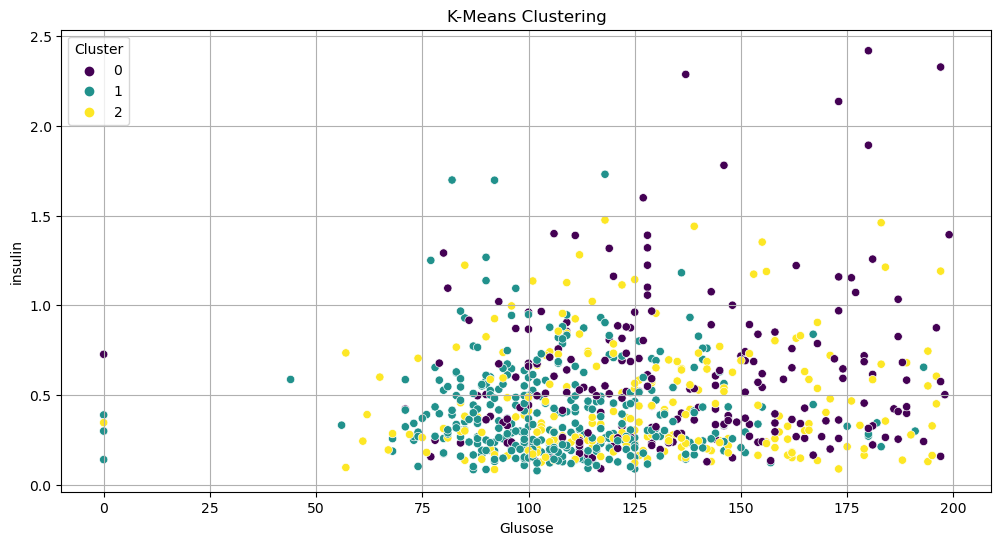

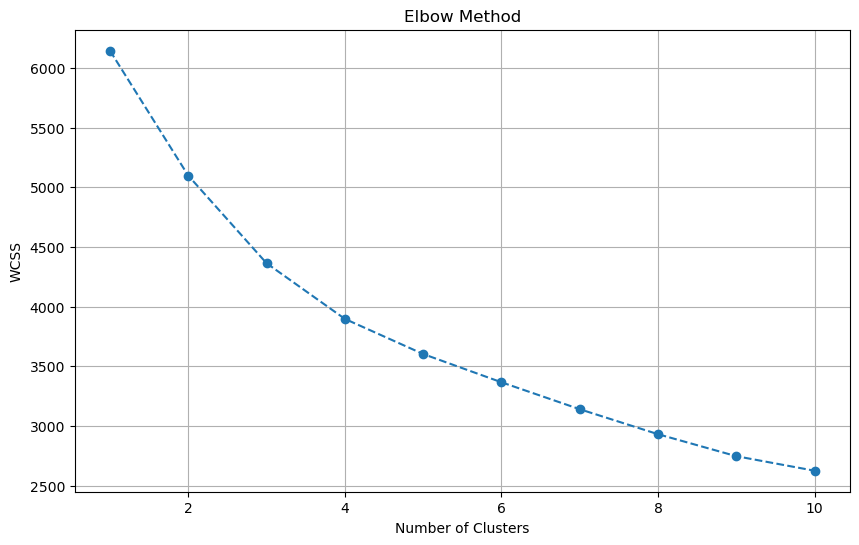

In [12]:
# Visualize clustering results (scatter plot)
"""
    Visualizes the clustering results using scatter plot and elbow method plot.

    Parameters:
    df (DataFrame): The input DataFrame containing features, target variable, and cluster labels.
    wcss (list): List of within-cluster sum of squares values for different numbers of clusters.

    Returns:
    None
"""
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Glucose', y='DiabetesPedigreeFunction', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Glusose')
plt.ylabel('insulin')
plt.grid(True)
plt.show()

# Elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

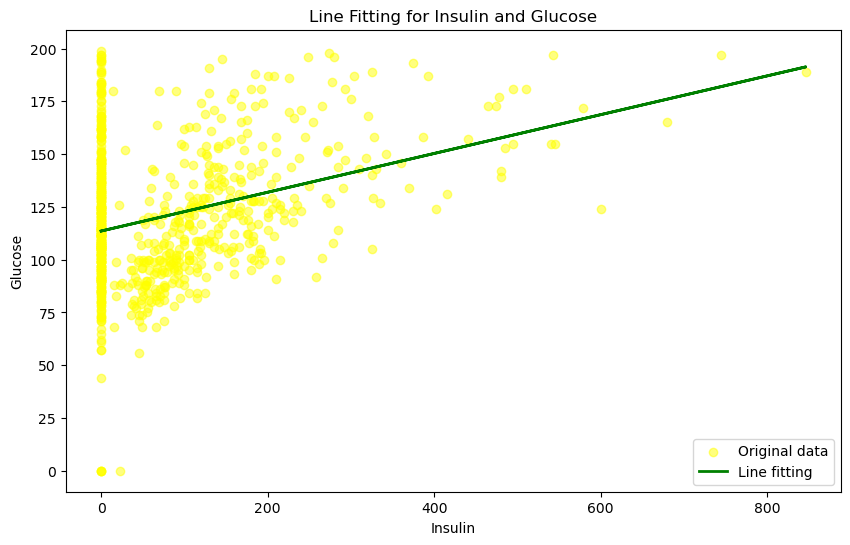

In [13]:
# Drop rows with NaN values in 'installment' and 'log.annual.inc'
df.dropna(subset=['Insulin', 'Glucose'], inplace=True)
"""
    Fits a linear regression model and plots the line fitting for the relationship between Insulin and Glucose.

    Parameters:
    df (DataFrame): The input DataFrame containing 'Insulin' and 'Glucose' columns.

    Returns:
    None
"""
# Selecting the features for line fitting
X = df['Insulin'].values.reshape(-1, 1)  # Reshape to a 2D array
y = df['Glucose']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plotting the line fitting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='yellow', alpha=0.5, label='Original data')
plt.plot(X, y_pred, color='green', linewidth=2, label='Line fitting')
plt.title('Line Fitting for Insulin and Glucose')
plt.xlabel('Insulin')
plt.ylabel('Glucose')
plt.legend()
plt.show()

In [14]:
# Calculate the skewness for each column
skewness_values = df.skew(numeric_only=True)

# Print the skewness values
print("Skewness values")
print(skewness_values)

Skewness values
Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
Cluster                    -0.057513
dtype: float64


In [15]:
# Calculate the kurtosis for each column
kurtosis_values = df.kurtosis(numeric_only=True)

# Print the kurtosis values
print("Kurtosis values")
print(kurtosis_values)

Kurtosis values
Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
Cluster                    -1.221084
dtype: float64
